# Gov Covid API
### https://coronavirus.data.gov.uk/developers-guide

Install library with: `pip install uk-covid19`

In [1]:
import uk_covid19 as cv
import pandas as pd

In [2]:
filters = ["areaType=ltla", "areaName=Gedling"] 
dataStructure = {   
    "date": "date", 
    "name": "areaName", 
    "code":"areaCode",
    "newCases": "newCasesBySpecimenDate", 
    "cumCases": "cumCasesBySpecimenDate", 
    "newDeaths": "newDeathsByDeathDate", 
    "cumDeathsByDeathDate":"cumDeathsByDeathDate"
    } 

objCV19 = cv.Cov19API(filters=filters, structure=dataStructure) 

result = objCV19.get_dataframe()
result = result.sort_values(by="date")

result.head()

,date,name,code,newCases,cumCases,newDeaths,cumDeathsByDeathDate
248,2020-02-21,Gedling,E07000173,1,1,NaN,NaN
247,2020-02-22,Gedling,E07000173,0,1,NaN,NaN
246,2020-02-23,Gedling,E07000173,0,1,NaN,NaN
245,2020-02-24,Gedling,E07000173,0,1,NaN,NaN
244,2020-02-25,Gedling,E07000173,0,1,NaN,NaN


In [3]:
filterDate = "2020-10-01"
selectedDates = result["date"] >= filterDate

df = result.loc[selectedDates]
df.head(30)

,date,name,code,newCases,cumCases,newDeaths,cumDeathsByDeathDate
25,2020-10-01,Gedling,E07000173,20,616,0.0,87.0
24,2020-10-02,Gedling,E07000173,33,649,0.0,87.0
23,2020-10-03,Gedling,E07000173,17,666,0.0,87.0
22,2020-10-04,Gedling,E07000173,31,697,1.0,88.0
21,2020-10-05,Gedling,E07000173,41,738,0.0,88.0
20,2020-10-06,Gedling,E07000173,52,790,0.0,88.0
19,2020-10-07,Gedling,E07000173,61,851,0.0,88.0
18,2020-10-08,Gedling,E07000173,82,933,0.0,88.0
17,2020-10-09,Gedling,E07000173,58,991,0.0,88.0
16,2020-10-10,Gedling,E07000173,47,1038,0.0,88.0


<AxesSubplot:xlabel='date'>

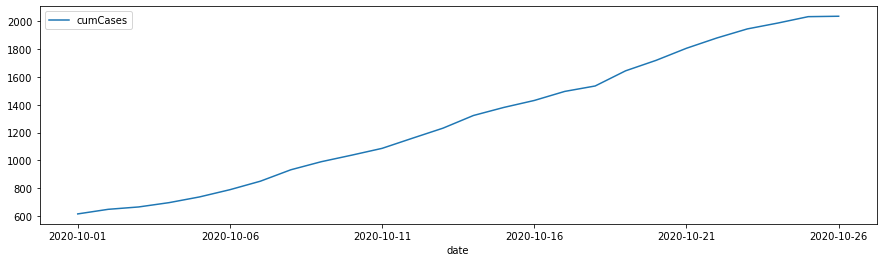

In [4]:
df.plot(figsize=(15,4), x="date", y="cumCases", kind="line")

<AxesSubplot:xlabel='date'>

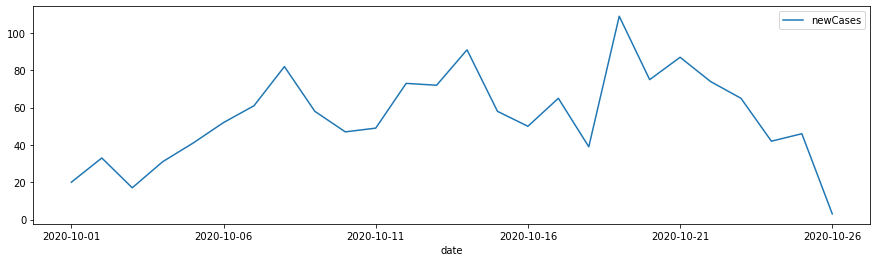

In [5]:
df.plot(figsize=(15,4), x="date", y="newCases", kind="line")

<AxesSubplot:xlabel='date'>

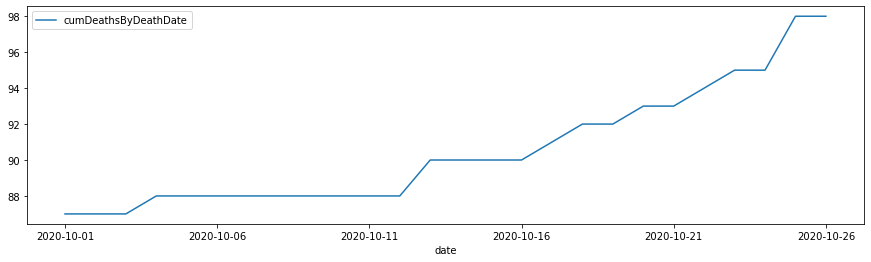

In [6]:
df.plot(figsize=(15,4), x="date", y="cumDeathsByDeathDate", kind="line")